In [1]:
import os
import numpy as np
import napari
import nd2
from skimage.draw import polygon
from skimage.measure import profile_line, regionprops_table
import pandas as pd


import matplotlib.pyplot as plt

In [2]:
path_im = r'D:\data_analysis\2022_Sahana\data\Collagen\60x images\092622_ring_PDMSAp_10MCol_647-Act_561-Pax_488-Plak_DAPI_001.nd2'

In [3]:
im = nd2.imread(path_im)

In [4]:
im.shape

(27, 4, 512, 512)

In [5]:
viewer = napari.Viewer()
viewer.add_image(im[:,0,:,:],colormap='magenta',blending='additive')
viewer.add_image(im[:,1,:,:],colormap='red',blending='additive')
viewer.add_image(im[:,2,:,:],colormap='green',blending='additive')
viewer.add_image(im[:,3,:,:],colormap='blue',blending='additive')

Validation errors in config file(s).
The following fields have been reset to the default value:

schema_version
  value is not a valid tuple (type=type_error.tuple)



Assistant skips harvesting pyclesperanto as it's not installed.


<Image layer 'Image [3]' at 0x1df15537e20>

In [6]:
im_max = np.max(im[:,0,:,:],axis=0)

In [7]:
im_max.shape

(512, 512)

In [12]:
viewer.add_image(im_max,blending='additive')

<Image layer 'im_max [1]' at 0x1df3352ad00>

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [10]:
viewer.layers

[<Image layer 'Image' at 0x1df7d582790>, <Image layer 'Image [1]' at 0x1df0b2c0d30>, <Image layer 'Image [2]' at 0x1df11965880>, <Image layer 'Image [3]' at 0x1df15537e20>, <Image layer 'im_max' at 0x1df13d3ba00>, <Image layer '0: Image: ch[0] tuba1b' at 0x1df13d090a0>, <Image layer '1: Intensity Normalization' at 0x1df1437da00>, <Image layer '1: Intensity Normalization [1]' at 0x1df178178e0>, <Image layer '2: Edge Preserving Smoothing' at 0x1df292a2430>, <Image layer '3: Filament Filter 3D' at 0x1df2adb4ac0>, <Image layer '4: Size Filter' at 0x1df1791de20>]

In [11]:
im_max = np.max(viewer.layers['4: Size Filter'].data,axis=0)

In [22]:
vertices_polygons = viewer.layers['Shapes'].data

In [23]:
mask_coord = polygon(vertices_polygons[0][:,1],vertices_polygons[0][:,2],shape=im_max.shape)

In [24]:
mask = np.zeros(im_max.shape)
mask[mask_coord] = 1

In [25]:
mask.shape

(512, 512)

In [13]:
viewer.add_labels(mask.astype('uint8'))

<Labels layer 'Labels' at 0x219ae0f2310>

In [14]:
pl_list = []

green_max = np.max(im[:,2,:,:],axis=0)

for i in range(len(vertices_polygons[0])-1):
    
    pl = profile_line(green_max,vertices_polygons[0][i,1:],vertices_polygons[0][i+1,1:])
    
    pl_list.extend(pl)
    

In [15]:
pl_list

[1849.0,
 1304.0,
 819.0,
 583.0,
 485.0,
 396.0,
 404.0,
 385.0,
 343.0,
 325.0,
 325.0,
 369.0,
 396.0,
 464.0,
 483.0,
 580.0,
 613.0,
 569.0,
 631.0,
 692.0,
 639.0,
 867.0,
 1335.0,
 1809.0,
 1766.0,
 1484.0,
 1293.0,
 1478.0,
 1602.0,
 1236.0,
 829.0,
 785.0,
 1233.0,
 2176.0,
 3053.0,
 3053.0,
 3428.0,
 2952.0,
 2340.0,
 1989.0,
 1929.0,
 1666.0,
 1266.0,
 888.0,
 767.0,
 740.0,
 882.0,
 819.0,
 604.0,
 487.0,
 570.0,
 707.0,
 908.0,
 969.0,
 820.0,
 677.0,
 506.0,
 548.0,
 685.0,
 975.0,
 837.0,
 769.0,
 659.0,
 588.0,
 869.0,
 1067.0,
 923.0,
 805.0,
 659.0,
 659.0,
 492.0,
 438.0,
 503.0,
 765.0,
 1124.0,
 1182.0,
 1088.0,
 949.0,
 914.0,
 1052.0,
 1431.0,
 1578.0,
 1743.0,
 1743.0,
 1381.0,
 1060.0,
 661.0,
 530.0,
 540.0,
 442.0,
 351.0,
 335.0,
 331.0,
 330.0,
 343.0,
 354.0,
 354.0,
 430.0,
 570.0,
 665.0,
 577.0,
 453.0,
 408.0,
 338.0,
 296.0,
 289.0,
 292.0,
 318.0,
 339.0,
 324.0,
 255.0,
 243.0,
 224.0,
 231.0,
 222.0,
 251.0,
 277.0,
 300.0,
 317.0,
 292.0,
 292.0,


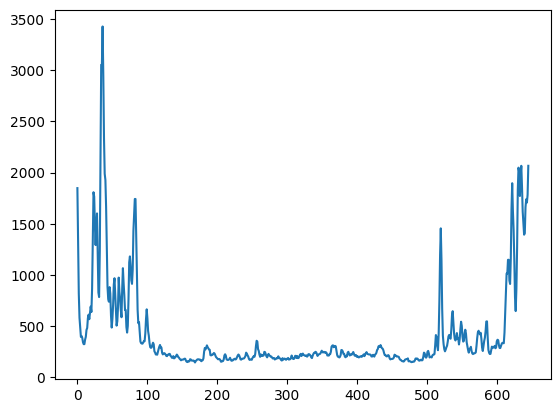

In [16]:
%matplotlib inline

plt.plot(pl_list)

In [25]:
cell_m = regionprops_table(mask.astype('uint8'),properties=['area','eccentricity','orientation','bbox','perimeter','image'])
df = pd.DataFrame(cell_m)

In [26]:
df

,area,eccentricity,orientation,bbox-0,bbox-1,bbox-2,bbox-3,perimeter,image
0,21558,0.923088,-1.180219,353,202,508,449,671.126984,"[[False, False, False, False, False, False, Fa..."


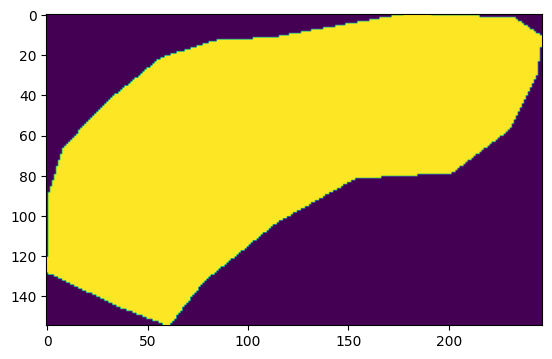

In [27]:
%matplotlib inline
plt.imshow(df.loc[0,'image'])

In [69]:
from skimage.transform import rotate

In [43]:
test = rotate(df.loc[0,'image'],-df.loc[0,'orientation']*180/np.pi,resize=True,clip=True,order=0)

<IPython.core.display.Javascript object>


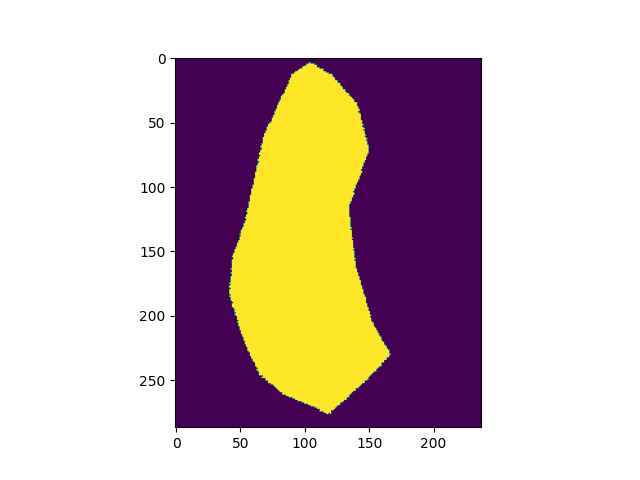

In [45]:
%matplotlib notebook
plt.imshow(test)

In [46]:
cell_m = regionprops_table(test.astype('uint8'),properties=['area','eccentricity','orientation','bbox','perimeter','image'])
df = pd.DataFrame(cell_m)

In [47]:
df

,area,eccentricity,orientation,bbox-0,bbox-1,bbox-2,bbox-3,perimeter,image
0,21551,0.923132,0.000029,4,42,277,167,722.080303,"[[False, False, False, False, False, False, Fa..."


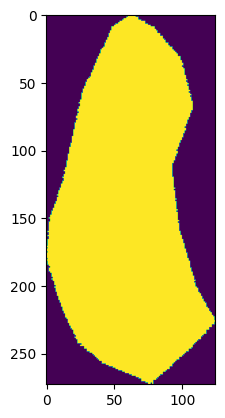

In [48]:
%matplotlib inline
plt.imshow(df.loc[0,'image'])

## Testing Allen Cell Segmenter from the notebook

In [13]:
# function for core algorithm
from aicssegmentation.core.vessel import filament_3d_wrapper
from aicssegmentation.core.pre_processing_utils import intensity_normalization, edge_preserving_smoothing_3d, image_smoothing_gaussian_3d
from skimage.morphology import remove_small_objects    

In [14]:
################################
## PARAMETERS for this step ##
intensity_scaling_param = [0]
################################
# intensity normalization
struct_img = intensity_normalization(im[:,0,:,:], scaling_param=intensity_scaling_param)

intensity normalization: min-max normalization with NO absoluteintensity upper bound


In [15]:
# smoothing with edge preserving smoothing 
structure_img_smooth = edge_preserving_smoothing_3d(struct_img)

In [16]:
viewer.add_image(structure_img_smooth)

<Image layer 'structure_img_smooth' at 0x1df3be27340>

In [17]:
################################
## PARAMETERS for this step ##
f3_param = [[1, 0.01]]
################################

bw = filament_3d_wrapper(structure_img_smooth, f3_param)

In [18]:
viewer.add_image(bw)

<Image layer 'bw' at 0x1df3bf760a0>

In [19]:
im_max = np.max(bw,axis=0)

In [20]:
viewer.add_image(im_max)

<Image layer 'im_max' at 0x1df13dedd60>

In [26]:
viewer.add_image(mask)

<Image layer 'mask' at 0x1df293886d0>

In [31]:
# cut a single cell from the segmented actin cytoskeleton
cell_m = regionprops_table(mask.astype('uint8'),intensity_image=im_max,properties=['intensity_image'])
df = pd.DataFrame(cell_m)

In [32]:
cell_cyto = df.loc[0,'intensity_image']

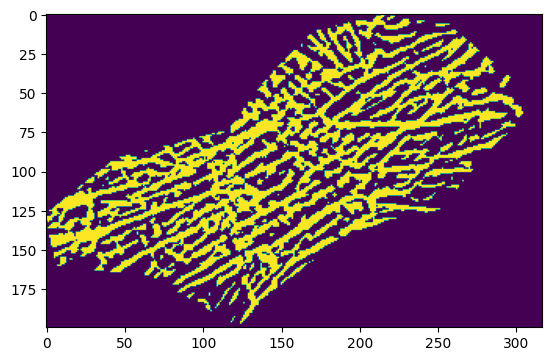

In [33]:
%matplotlib inline
plt.imshow(cell_cyto)

In [36]:
from scipy.fft import fft2, fftshift
from skimage import img_as_float
from skimage.filters import window

In [37]:
image = img_as_float(cell_cyto)

wimage = image * window('hann', cell_cyto.shape)

In [38]:
image_f = np.abs(fftshift(fft2(cell_cyto)))
wimage_f = np.abs(fftshift(fft2(wimage)))

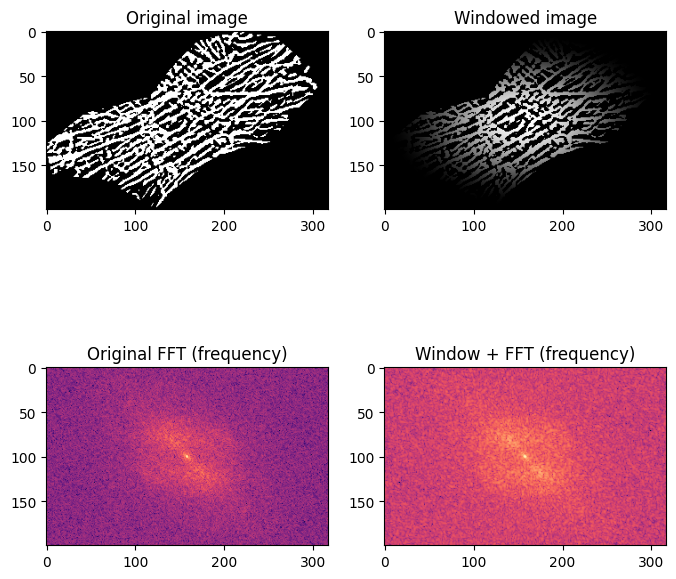

In [39]:
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(cell_cyto, cmap='gray')
ax[1].set_title("Windowed image")
ax[1].imshow(wimage, cmap='gray')
ax[2].set_title("Original FFT (frequency)")
ax[2].imshow(np.log(image_f), cmap='magma')
ax[3].set_title("Window + FFT (frequency)")
ax[3].imshow(np.log(wimage_f), cmap='magma')
plt.show()

In [45]:
np.max(image_f)

14529.0

In [48]:
np.unravel_index(image_f.argmax(), image_f.shape)

(100, 158)

In [49]:
image_f.shape

(200, 317)

In [50]:
from skimage.transform import hough_line, hough_line_peaks

In [51]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(cell_cyto, theta=tested_angles)

In [52]:
hough_line_peaks(h, theta, d)

(array([234, 225, 217, 215, 211, 210, 210, 201, 190, 188, 188, 187, 187,
        186, 186, 184, 178, 178, 166, 164, 157, 144, 143, 140, 133, 130,
        130, 129, 127, 126, 119], dtype=uint64),
 array([ 1.26536371,  1.12573737,  1.13446401,  1.24791042,  0.78539816,
         1.09955743,  1.36135682,  1.10828408,  0.78539816,  0.78539816,
         0.9424778 ,  1.02101761,  0.78539816,  0.78539816,  1.3962634 ,
         1.29154365,  0.78539816, -1.56206968, -1.54461639,  1.48352986,
         0.88139127,  0.99483767,  0.89011792, -1.43116999,  0.46251225,
         0.55850536,  0.56723201,  0.49741884, -1.57079633,  0.61959188,
        -1.5097098 ]),
 array([ 141.68891856,  163.71829105,  148.69826435,  120.66088117,
         218.7917223 ,  129.6728972 ,  119.65954606,  117.65687583,
         170.72763685,  182.74365821,  152.70360481,  181.7423231 ,
         148.69826435,  199.76635514,  104.63951936,  157.71028037,
         136.68224299, -120.66088117,  -91.62216288,   88.61815754,
    

In [56]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

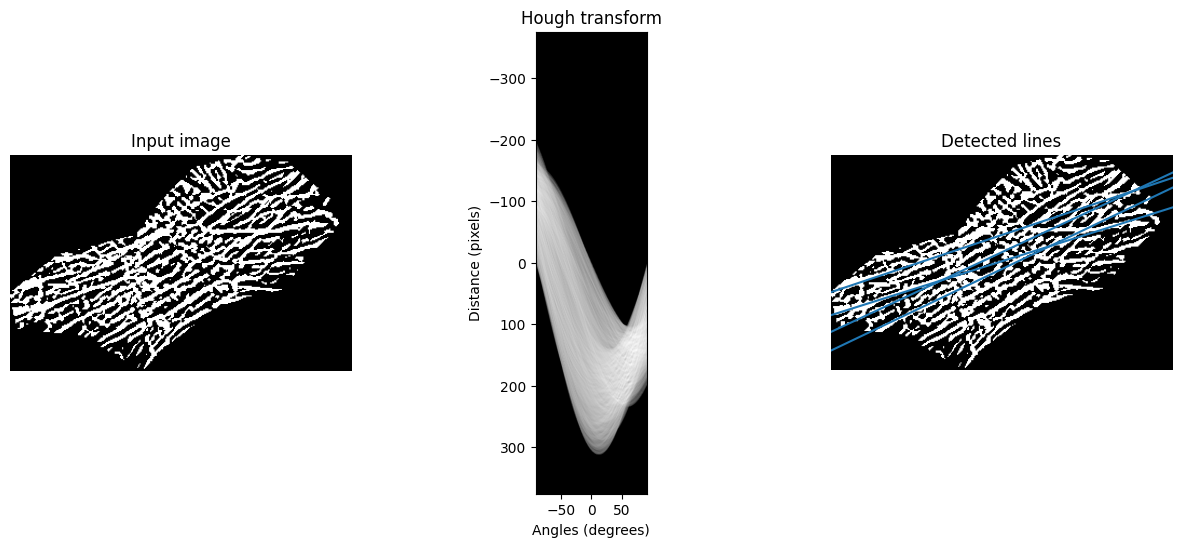

In [ ]:
%matplotlib inline

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(cell_cyto, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(cell_cyto, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

_, angle_array, dist_array = hough_line_peaks(h, theta, d)

for angle, dist in zip(angle_array,dist_array):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))
    


In [67]:
dominant_flow = np.mean(angle_array[:4])

In [72]:
test = rotate(cell_cyto,dominant_flow*180/np.pi,resize=True,clip=True,order=0)

<IPython.core.display.Javascript object>


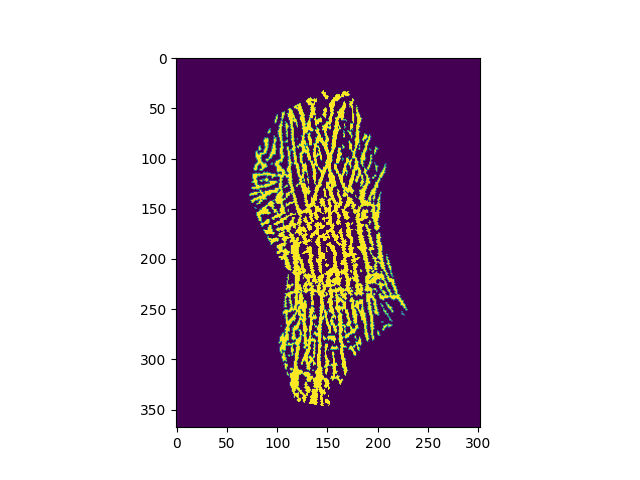

In [73]:
%matplotlib notebook
plt.imshow(test)